In [2]:
from tensorflow.keras.models import load_model
from VisionUtils import *
#from imgaug import augmenters as iaa
from Manager import *
from sklearn.model_selection import train_test_split

import tensorflow.keras.backend as k
import tensorflow as tf
import matplotlib.pyplot as plt
import os 
#import imgaug
import shutil
import tqdm
tf.enable_eager_execution()
tf.__version__

'1.13.1'

In [3]:
print(tf.test.is_gpu_available())

True


In [4]:
# tf.data api batch_size
BATCH_SIZE = 64

In [5]:
m = load_model("Models/FaceNet/model/saved_model.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
### Important Dirrectories
IMG_RT_PATH = 'data/processed2/images2/'
FEATURE_RT_PATH = "data/image_features/"
FEATURE_AUG_RT_PATH = "data/image_aug_features/"
IMG_AUG_RT_PATH = 'data/images_aug/'

In [7]:

import pathlib
data_root = pathlib.Path(IMG_RT_PATH)
print('data_root: ', data_root)

data_root:  data\processed2\images2


In [8]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [9]:
all_dir_paths = [str(item_path) for item_path in data_root.iterdir() if '.DS_Store' not in str(item_path)]
all_dir_paths[:5]

['data\\processed2\\images2\\n000002',
 'data\\processed2\\images2\\n000003',
 'data\\processed2\\images2\\n000004',
 'data\\processed2\\images2\\n000005',
 'data\\processed2\\images2\\n000006']

In [10]:
len(all_dir_paths)

1077

In [11]:
image_dir_paths_train, image_dir_paths_test, = train_test_split(all_dir_paths, test_size=0.2, shuffle=False)


In [12]:
len(image_dir_paths_train), image_dir_paths_train[0]

(861, 'data\\processed2\\images2\\n000002')

In [13]:
len(image_dir_paths_test), image_dir_paths_test[0]

(216, 'data\\processed2\\images2\\n000907')

In [14]:
all_train_image_paths = []
for image_dir_train_path in tqdm.tqdm(image_dir_paths_train[:606]):
    root = pathlib.Path(image_dir_train_path)
    train_image_paths = list(root.glob('*.jpg'))
    train_image_paths = [ str(item_path) for item_path in train_image_paths if '.DS_Store' not in str(item_path)]
    all_train_image_paths += train_image_paths

random.shuffle(all_train_image_paths)
train_image_count = len(all_train_image_paths)
train_image_count, all_train_image_paths[0]

100%|██████████████████████████████████████████████████████████████████████| 606/606 [00:01<00:00, 448.89it/s]


(210644, 'data\\processed2\\images2\\n000323\\0054_02.jpg')

In [15]:
all_test_image_paths = []
for image_dir_test_path in tqdm.tqdm(image_dir_paths_test[:100]):
    root = pathlib.Path(image_dir_test_path)
    test_image_paths = list(root.glob('*.jpg'))
    test_image_paths = [ str(item_path) for item_path in test_image_paths if '.DS_Store' not in str(item_path)]
    all_test_image_paths += test_image_paths

random.shuffle(all_test_image_paths)
test_image_count = len(all_test_image_paths)
test_image_count, all_test_image_paths[0]

100%|██████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 524.96it/s]


(34131, 'data\\processed2\\images2\\n000999\\0181_01.jpg')

In [16]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())

In [17]:
label_to_index = dict((name, index) for index,name in enumerate(label_names))


In [18]:
index_to_label = dict((index,name) for index,name in enumerate(label_names))
index_to_label

{0: 'n000002',
 1: 'n000003',
 2: 'n000004',
 3: 'n000005',
 4: 'n000006',
 5: 'n000007',
 6: 'n000008',
 7: 'n000010',
 8: 'n000011',
 9: 'n000012',
 10: 'n000013',
 11: 'n000014',
 12: 'n000015',
 13: 'n000016',
 14: 'n000017',
 15: 'n000018',
 16: 'n000019',
 17: 'n000020',
 18: 'n000021',
 19: 'n000022',
 20: 'n000023',
 21: 'n000024',
 22: 'n000025',
 23: 'n000026',
 24: 'n000027',
 25: 'n000028',
 26: 'n000030',
 27: 'n000031',
 28: 'n000032',
 29: 'n000033',
 30: 'n000034',
 31: 'n000035',
 32: 'n000036',
 33: 'n000037',
 34: 'n000038',
 35: 'n000039',
 36: 'n000041',
 37: 'n000042',
 38: 'n000043',
 39: 'n000044',
 40: 'n000045',
 41: 'n000046',
 42: 'n000047',
 43: 'n000048',
 44: 'n000049',
 45: 'n000050',
 46: 'n000051',
 47: 'n000052',
 48: 'n000053',
 49: 'n000054',
 50: 'n000055',
 51: 'n000056',
 52: 'n000057',
 53: 'n000058',
 54: 'n000059',
 55: 'n000060',
 56: 'n000061',
 57: 'n000062',
 58: 'n000063',
 59: 'n000064',
 60: 'n000065',
 61: 'n000066',
 62: 'n000067',
 6

In [19]:
all_train_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_train_image_paths]

print("First 10 labels indices: ", all_train_image_labels[:10])

First 10 labels indices:  [306, 454, 269, 39, 79, 321, 580, 38, 123, 405]


In [20]:
all_test_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_test_image_paths]

print("First 10 labels indices: ", all_test_image_labels[:10])

First 10 labels indices:  [946, 917, 935, 880, 869, 887, 906, 921, 890, 893]


In [21]:
def load_positive_path_match(label_index, img_path1, base="data\\processed2\\images2\\"):
    label = index_to_label[label_index]
    dir_path = base+label
    img_path2 = dir_path+'\\'+random.choice(os.listdir(dir_path))
    return label_index, img_path1, label_index, img_path2
    

In [22]:
def load_random_path_match(label_index1, img_path1, dirs, base="data\\processed2\\images2\\"):
    random_dir = random.choice(dirs)
    label = random_dir.split('\\')[-1]
    label_index = label_to_index[label]
    dir_files = os.listdir(random_dir)
    if len(dir_files) != 0:
        random_file = random.choice(dir_files)
        while '.jpg' not in random_file:
            #print('redo random.choice(dir_files) : ', random_dir)
            random_file = random.choice(dir_files)
        img_path2 = random_dir+'\\'+random_file
        return label_index1, img_path1, label_index, img_path2
    else:
        return '', '', '', ''


In [23]:
img_path1 = all_train_image_paths[0]
label_index = all_train_image_labels[0]
load_random_path_match(label_index, img_path1, image_dir_paths_train)

(306,
 'data\\processed2\\images2\\n000323\\0054_02.jpg',
 0,
 'data\\processed2\\images2\\n000002\\0305_01.jpg')

In [24]:
img_path1 = all_train_image_paths[0]
label_index = all_train_image_labels[0]
load_positive_path_match(label_index, img_path1)

(306,
 'data\\processed2\\images2\\n000323\\0054_02.jpg',
 306,
 'data\\processed2\\images2\\n000323\\0103_01.jpg')

In [25]:
all_train_image_paths[0]


'data\\processed2\\images2\\n000323\\0054_02.jpg'

In [26]:
all_train_image_labels[0]

306

In [27]:
all_train_image_pair_paths = []
all_train_image_pair_labels = []
all_train_data_labels = []

for label_index, image_path in tqdm.tqdm(zip(all_train_image_labels, all_train_image_paths), total=len(all_train_image_labels)):
    choice = random.choice([0,1])
    if choice == 0:
        label_index1, img_path1, label_index2, img_path2 = load_random_path_match(label_index, image_path, image_dir_paths_train)
        all_train_image_pair_paths.append((img_path1, img_path2))
        all_train_image_pair_labels.append((label_index1, label_index2))
        if label_index1 == '' or label_index2 == '':
            continue
        if label_index1 == label_index2:
            all_train_data_labels.append(1)
        else:
            all_train_data_labels.append(0)
    else:
        label_index1, img_path1, label_index2, img_path2 = load_positive_path_match(label_index, image_path)
        all_train_image_pair_paths.append((img_path1, img_path2))
        all_train_image_pair_labels.append((label_index1, label_index2))
        if label_index1 == label_index2:
            all_train_data_labels.append(1)
        else:
            all_train_data_labels.append(0)


len(all_train_image_pair_paths), len(all_train_image_pair_labels), len(all_train_data_labels) 

100%|███████████████████████████████████████████████████████████████| 210644/210644 [00:53<00:00, 3905.98it/s]


(210644, 210644, 210644)

In [28]:
all_train_image_pair_paths[:5], all_train_image_pair_labels[:5], all_train_data_labels[:10]

([('data\\processed2\\images2\\n000323\\0054_02.jpg',
   'data\\processed2\\images2\\n000566\\0180_01.jpg'),
  ('data\\processed2\\images2\\n000476\\0313_01.jpg',
   'data\\processed2\\images2\\n000726\\0094_02.jpg'),
  ('data\\processed2\\images2\\n000286\\0116_01.jpg',
   'data\\processed2\\images2\\n000286\\0229_02.jpg'),
  ('data\\processed2\\images2\\n000044\\0380_01.jpg',
   'data\\processed2\\images2\\n000516\\0291_01.jpg'),
  ('data\\processed2\\images2\\n000086\\0314_01.jpg',
   'data\\processed2\\images2\\n000086\\0025_01.jpg')],
 [(306, 541), (454, 691), (269, 269), (39, 493), (79, 79)],
 [0, 0, 1, 0, 1, 1, 1, 1, 0, 0])

In [29]:
a, b = list(zip(*all_train_image_pair_paths[:5]))
a

('data\\processed2\\images2\\n000323\\0054_02.jpg',
 'data\\processed2\\images2\\n000476\\0313_01.jpg',
 'data\\processed2\\images2\\n000286\\0116_01.jpg',
 'data\\processed2\\images2\\n000044\\0380_01.jpg',
 'data\\processed2\\images2\\n000086\\0314_01.jpg')

In [30]:
all_test_image_pair_paths = []
all_test_image_pair_labels = []
all_test_data_labels = []

for label_index, image_path in tqdm.tqdm(zip(all_test_image_labels, all_test_image_paths), total=len(all_test_image_labels)):
    choice = random.choice([0,1])
    if choice == 0:
        label_index1, img_path1, label_index2, img_path2 = load_random_path_match(label_index, image_path, image_dir_paths_test)
        all_test_image_pair_paths.append((img_path1, img_path2))
        all_test_image_pair_labels.append((label_index1, label_index2))
        if label_index1 == label_index2:
            all_test_data_labels.append(1)
        else:
            all_test_data_labels.append(0)
    else:
        label_index1, img_path1, label_index2, img_path2 = load_positive_path_match(label_index, image_path)
        all_test_image_pair_paths.append((img_path1, img_path2))
        all_test_image_pair_labels.append((label_index1, label_index2))
        if label_index1 == label_index2:
            all_test_data_labels.append(1)
        else:
            all_test_data_labels.append(0)

len(all_test_image_pair_paths), len(all_test_image_pair_labels), len(all_test_data_labels) 

100%|█████████████████████████████████████████████████████████████████| 34131/34131 [00:08<00:00, 4070.93it/s]


(34131, 34131, 34131)

In [31]:
all_test_image_pair_paths[:5], all_test_image_pair_labels[:5], all_test_data_labels[:10]

([('data\\processed2\\images2\\n000999\\0181_01.jpg',
   'data\\processed2\\images2\\n000999\\0156_01.jpg'),
  ('data\\processed2\\images2\\n000969\\0051_01.jpg',
   'data\\processed2\\images2\\n000969\\0196_01.jpg'),
  ('data\\processed2\\images2\\n000987\\0075_03.jpg',
   'data\\processed2\\images2\\n000987\\0257_01.jpg'),
  ('data\\processed2\\images2\\n000927\\0230_01.jpg',
   'data\\processed2\\images2\\n000927\\0022_01.jpg'),
  ('data\\processed2\\images2\\n000916\\0030_01.jpg',
   'data\\processed2\\images2\\n000916\\0016_01.jpg')],
 [(946, 946), (917, 917), (935, 935), (880, 880), (869, 869)],
 [1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [32]:
def preprocess_image(path):
    image = tf.read_file(path)
    
    image = tf.image.decode_jpeg(image, channels=3)

    return image

In [33]:
def load_and_preprocess_image(paths):
#     paths = tf.constant(np.array(list(paths)))
    return tf.map_fn(preprocess_image, paths)

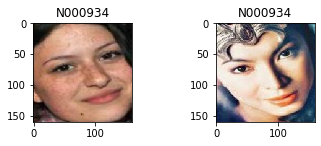

In [34]:
import matplotlib.pyplot as plt


img_paths = all_train_image_pair_paths[0]
label_indexs = all_train_image_pair_labels[0]
image1, image2 = preprocess_image(img_paths[0]), preprocess_image(img_paths[1])
plt.subplot(2,2,1)
plt.imshow(image1)
plt.title(label_names[label_index].title())


plt.subplot(2,2,2)
plt.imshow(image2)

plt.grid(False)
plt.title(label_names[label_index].title())
print()

In [35]:
label_indexs

(306, 541)

In [36]:
input_shape = m.input_shape[1:]

In [37]:
input_shape

(160, 160, 3)

In [38]:
for layer in m.layers:
    layer.trainable = False

In [39]:
def squared_differences(pair_of_tensors):
    x, y = pair_of_tensors
    return k.abs(x - y)

In [40]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Lambda, add, Dropout, BatchNormalization

inputs1 = Input(input_shape)
inputs2 = Input(input_shape)
x1 = m(inputs1)
x2 = m(inputs2)
x1 = Model(inputs = inputs1, outputs = x1)
x2 = Model(inputs = inputs2, outputs = x2)


x = Lambda(squared_differences)([x1.output, x2.output])
x = BatchNormalization()(x)
x = Dense(4, activation = tf.nn.relu)(x)
x = Dropout(rate=0.25)(x)
x = BatchNormalization()(x)
output = Dense(1, activation = 'sigmoid')(x)

In [41]:
model = Model(inputs =[x1.input,x2.input], outputs=output)
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001), 
    loss = 'binary_crossentropy', 
    metrics = ["accuracy"],
)


In [42]:
all_train_image_pair_paths_a, all_train_image_pair_paths_b = list(zip(*all_train_image_pair_paths))
all_train_image_pair_paths_a = list(all_train_image_pair_paths_a)
all_train_image_pair_paths_b = list(all_train_image_pair_paths_b)

In [43]:
path_ds_a = tf.data.Dataset.from_tensor_slices(all_train_image_pair_paths_a)
path_ds_b = tf.data.Dataset.from_tensor_slices(all_train_image_pair_paths_b)

type(path_ds_a)

tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter

In [44]:
train_image_datasource_a = path_ds_a.map(preprocess_image, num_parallel_calls=AUTOTUNE)
train_image_datasource_b = path_ds_b.map(preprocess_image, num_parallel_calls=AUTOTUNE)
train_image_datasource = tf.data.Dataset.zip((train_image_datasource_a, train_image_datasource_b))

In [45]:
train_label_datasource = tf.data.Dataset.from_tensor_slices(tf.cast(all_train_data_labels, tf.int64))

In [46]:
train_datasource = tf.data.Dataset.zip((train_image_datasource, train_label_datasource))

In [47]:
all_test_image_pair_paths_a, all_test_image_pair_paths_b = list(zip(*all_test_image_pair_paths))
all_test_image_pair_paths_a = list(all_test_image_pair_paths_a)
all_test_image_pair_paths_b = list(all_test_image_pair_paths_b)

In [48]:
#list(zip(all_test_image_pair_paths, all_test_data_labels))

In [49]:
test_path_ds_a = tf.data.Dataset.from_tensor_slices(all_test_image_pair_paths_a)
test_path_ds_b = tf.data.Dataset.from_tensor_slices(all_test_image_pair_paths_b)

type(test_path_ds_a)

tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter

In [50]:
test_image_datasource_a = test_path_ds_a.map(preprocess_image, num_parallel_calls=AUTOTUNE)
test_image_datasource_b = test_path_ds_b.map(preprocess_image, num_parallel_calls=AUTOTUNE)
test_image_datasource = tf.data.Dataset.zip((test_image_datasource_a, test_image_datasource_b))

In [51]:
test_label_datasource = tf.data.Dataset.from_tensor_slices(tf.cast(all_test_data_labels, tf.int64))

In [52]:
test_datasource = tf.data.Dataset.zip((test_image_datasource, test_label_datasource))

In [53]:
#train_datasource = train_datasource.shuffle(buffer_size = 10000 )

In [54]:
train_datasource = train_datasource.repeat()

In [55]:
train_datasource = train_datasource.batch(BATCH_SIZE)

In [56]:
train_datasource = train_datasource.prefetch(buffer_size=AUTOTUNE)

In [57]:
# test_datasource = test_datasource.shuffle(buffer_size=1000)

In [58]:
test_datasource = test_datasource.repeat()

In [59]:
test_datasource = test_datasource.batch(BATCH_SIZE)

In [60]:
test_datasource = test_datasource.prefetch(buffer_size=AUTOTUNE)

In [61]:
int(len(all_test_image_pair_paths)/BATCH_SIZE)

533

In [ ]:

callbacks = [
  # Interrupt training if `val_loss` stops improving for over 2 epochs
  #tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
  # Write TensorBoard logs to `./logs` directory
  tf.keras.callbacks.TensorBoard(log_dir='./logs')
]
model.fit(train_datasource, epochs=100, callbacks = callbacks, steps_per_epoch=int(len(all_train_image_pair_paths)/BATCH_SIZE),
          validation_data=test_datasource, 
          validation_steps=int(len(all_test_image_pair_paths)/BATCH_SIZE))

Epoch 1/100
Instructions for updating:
Use tf.cast instead.


 198/3291 [>.............................] - ETA: 27:05:17 - loss: 1.0133 - acc: 0.359 - ETA: 13:58:57 - loss: 0.9900 - acc: 0.398 - ETA: 9:36:09 - loss: 1.0303 - acc: 0.390 - ETA: 7:25:16 - loss: 1.0175 - acc: 0.38 - ETA: 6:06:08 - loss: 1.0480 - acc: 0.37 - ETA: 5:13:48 - loss: 1.0390 - acc: 0.38 - ETA: 4:36:04 - loss: 1.0283 - acc: 0.38 - ETA: 4:07:58 - loss: 1.0158 - acc: 0.39 - ETA: 3:45:59 - loss: 0.9977 - acc: 0.40 - ETA: 3:28:34 - loss: 0.9926 - acc: 0.41 - ETA: 3:14:10 - loss: 0.9883 - acc: 0.41 - ETA: 3:02:17 - loss: 0.9690 - acc: 0.42 - ETA: 2:52:13 - loss: 0.9734 - acc: 0.42 - ETA: 2:43:32 - loss: 0.9686 - acc: 0.42 - ETA: 2:36:09 - loss: 0.9629 - acc: 0.43 - ETA: 2:29:31 - loss: 0.9524 - acc: 0.43 - ETA: 2:23:46 - loss: 0.9427 - acc: 0.44 - ETA: 2:18:34 - loss: 0.9303 - acc: 0.45 - ETA: 2:14:02 - loss: 0.9220 - acc: 0.45 - ETA: 2:09:49 - loss: 0.9117 - acc: 0.46 - ETA: 2:06:08 - loss: 0.9068 - acc: 0.47 - ETA: 2:02:37 - loss: 0.8956 - acc: 0.47 - ETA: 1:59:33 - loss: 0.885

 606/3291 [====>.........................] - ETA: 44:38 - loss: 0.4136 - acc: 0.81 - ETA: 44:36 - loss: 0.4136 - acc: 0.81 - ETA: 44:35 - loss: 0.4132 - acc: 0.81 - ETA: 44:33 - loss: 0.4127 - acc: 0.81 - ETA: 44:32 - loss: 0.4126 - acc: 0.81 - ETA: 44:30 - loss: 0.4124 - acc: 0.81 - ETA: 44:29 - loss: 0.4119 - acc: 0.81 - ETA: 44:27 - loss: 0.4115 - acc: 0.81 - ETA: 44:25 - loss: 0.4112 - acc: 0.81 - ETA: 44:24 - loss: 0.4108 - acc: 0.81 - ETA: 44:22 - loss: 0.4105 - acc: 0.81 - ETA: 44:21 - loss: 0.4103 - acc: 0.81 - ETA: 44:19 - loss: 0.4101 - acc: 0.81 - ETA: 44:17 - loss: 0.4099 - acc: 0.81 - ETA: 44:16 - loss: 0.4094 - acc: 0.81 - ETA: 44:14 - loss: 0.4089 - acc: 0.81 - ETA: 44:13 - loss: 0.4088 - acc: 0.81 - ETA: 44:11 - loss: 0.4084 - acc: 0.81 - ETA: 44:10 - loss: 0.4081 - acc: 0.81 - ETA: 44:08 - loss: 0.4077 - acc: 0.81 - ETA: 44:07 - loss: 0.4078 - acc: 0.81 - ETA: 44:05 - loss: 0.4077 - acc: 0.81 - ETA: 44:04 - loss: 0.4072 - acc: 0.81 - ETA: 44:02 - loss: 0.4071 - acc: 0.

 810/3291 [======>.......................] - ETA: 40:30 - loss: 0.3758 - acc: 0.83 - ETA: 40:29 - loss: 0.3757 - acc: 0.83 - ETA: 40:28 - loss: 0.3756 - acc: 0.83 - ETA: 40:27 - loss: 0.3756 - acc: 0.83 - ETA: 40:26 - loss: 0.3755 - acc: 0.83 - ETA: 40:25 - loss: 0.3753 - acc: 0.83 - ETA: 40:23 - loss: 0.3751 - acc: 0.83 - ETA: 40:22 - loss: 0.3750 - acc: 0.83 - ETA: 40:21 - loss: 0.3751 - acc: 0.83 - ETA: 40:20 - loss: 0.3748 - acc: 0.83 - ETA: 40:19 - loss: 0.3746 - acc: 0.83 - ETA: 40:18 - loss: 0.3748 - acc: 0.83 - ETA: 40:17 - loss: 0.3746 - acc: 0.83 - ETA: 40:15 - loss: 0.3744 - acc: 0.83 - ETA: 40:14 - loss: 0.3742 - acc: 0.83 - ETA: 40:13 - loss: 0.3740 - acc: 0.83 - ETA: 40:12 - loss: 0.3739 - acc: 0.83 - ETA: 40:11 - loss: 0.3737 - acc: 0.83 - ETA: 40:10 - loss: 0.3736 - acc: 0.83 - ETA: 40:09 - loss: 0.3735 - acc: 0.83 - ETA: 40:08 - loss: 0.3734 - acc: 0.83 - ETA: 40:07 - loss: 0.3733 - acc: 0.83 - ETA: 40:05 - loss: 0.3732 - acc: 0.83 - ETA: 40:04 - loss: 0.3730 - acc: 0.

1014/3291 [========>.....................] - ETA: 36:53 - loss: 0.3565 - acc: 0.84 - ETA: 36:52 - loss: 0.3563 - acc: 0.84 - ETA: 36:51 - loss: 0.3561 - acc: 0.84 - ETA: 36:49 - loss: 0.3560 - acc: 0.84 - ETA: 36:48 - loss: 0.3559 - acc: 0.84 - ETA: 36:47 - loss: 0.3559 - acc: 0.84 - ETA: 36:46 - loss: 0.3557 - acc: 0.84 - ETA: 36:45 - loss: 0.3557 - acc: 0.84 - ETA: 36:44 - loss: 0.3555 - acc: 0.84 - ETA: 36:43 - loss: 0.3554 - acc: 0.84 - ETA: 36:42 - loss: 0.3552 - acc: 0.84 - ETA: 36:41 - loss: 0.3553 - acc: 0.84 - ETA: 36:40 - loss: 0.3550 - acc: 0.84 - ETA: 36:39 - loss: 0.3548 - acc: 0.84 - ETA: 36:38 - loss: 0.3548 - acc: 0.84 - ETA: 36:37 - loss: 0.3547 - acc: 0.84 - ETA: 36:36 - loss: 0.3545 - acc: 0.84 - ETA: 36:35 - loss: 0.3544 - acc: 0.84 - ETA: 36:34 - loss: 0.3544 - acc: 0.84 - ETA: 36:33 - loss: 0.3545 - acc: 0.84 - ETA: 36:32 - loss: 0.3544 - acc: 0.84 - ETA: 36:31 - loss: 0.3545 - acc: 0.84 - ETA: 36:30 - loss: 0.3543 - acc: 0.84 - ETA: 36:29 - loss: 0.3541 - acc: 0.

1218/3291 [==========>...................] - ETA: 33:29 - loss: 0.3418 - acc: 0.85 - ETA: 33:28 - loss: 0.3417 - acc: 0.85 - ETA: 33:27 - loss: 0.3416 - acc: 0.85 - ETA: 33:26 - loss: 0.3415 - acc: 0.85 - ETA: 33:25 - loss: 0.3417 - acc: 0.85 - ETA: 33:24 - loss: 0.3416 - acc: 0.85 - ETA: 33:23 - loss: 0.3416 - acc: 0.85 - ETA: 33:23 - loss: 0.3416 - acc: 0.85 - ETA: 33:22 - loss: 0.3414 - acc: 0.85 - ETA: 33:21 - loss: 0.3413 - acc: 0.85 - ETA: 33:20 - loss: 0.3413 - acc: 0.85 - ETA: 33:19 - loss: 0.3413 - acc: 0.85 - ETA: 33:18 - loss: 0.3413 - acc: 0.85 - ETA: 33:17 - loss: 0.3412 - acc: 0.85 - ETA: 33:16 - loss: 0.3411 - acc: 0.85 - ETA: 33:15 - loss: 0.3411 - acc: 0.85 - ETA: 33:15 - loss: 0.3409 - acc: 0.85 - ETA: 33:14 - loss: 0.3409 - acc: 0.85 - ETA: 33:13 - loss: 0.3408 - acc: 0.85 - ETA: 33:12 - loss: 0.3407 - acc: 0.85 - ETA: 33:11 - loss: 0.3406 - acc: 0.85 - ETA: 33:10 - loss: 0.3405 - acc: 0.85 - ETA: 33:09 - loss: 0.3404 - acc: 0.85 - ETA: 33:08 - loss: 0.3403 - acc: 0.

1422/3291 [===========>..................] - ETA: 30:17 - loss: 0.3313 - acc: 0.86 - ETA: 30:16 - loss: 0.3312 - acc: 0.86 - ETA: 30:15 - loss: 0.3312 - acc: 0.86 - ETA: 30:14 - loss: 0.3311 - acc: 0.86 - ETA: 30:13 - loss: 0.3311 - acc: 0.86 - ETA: 30:12 - loss: 0.3311 - acc: 0.86 - ETA: 30:11 - loss: 0.3310 - acc: 0.86 - ETA: 30:10 - loss: 0.3309 - acc: 0.86 - ETA: 30:09 - loss: 0.3309 - acc: 0.86 - ETA: 30:08 - loss: 0.3309 - acc: 0.86 - ETA: 30:08 - loss: 0.3310 - acc: 0.86 - ETA: 30:07 - loss: 0.3310 - acc: 0.86 - ETA: 30:06 - loss: 0.3309 - acc: 0.86 - ETA: 30:05 - loss: 0.3308 - acc: 0.86 - ETA: 30:04 - loss: 0.3307 - acc: 0.86 - ETA: 30:03 - loss: 0.3306 - acc: 0.86 - ETA: 30:02 - loss: 0.3305 - acc: 0.86 - ETA: 30:01 - loss: 0.3306 - acc: 0.86 - ETA: 30:00 - loss: 0.3305 - acc: 0.86 - ETA: 29:59 - loss: 0.3305 - acc: 0.86 - ETA: 29:58 - loss: 0.3305 - acc: 0.86 - ETA: 29:57 - loss: 0.3305 - acc: 0.86 - ETA: 29:56 - loss: 0.3305 - acc: 0.86 - ETA: 29:55 - loss: 0.3305 - acc: 0.

1626/3291 [=============>................] - ETA: 27:08 - loss: 0.3243 - acc: 0.86 - ETA: 27:07 - loss: 0.3242 - acc: 0.86 - ETA: 27:06 - loss: 0.3242 - acc: 0.86 - ETA: 27:06 - loss: 0.3242 - acc: 0.86 - ETA: 27:05 - loss: 0.3242 - acc: 0.86 - ETA: 27:04 - loss: 0.3241 - acc: 0.86 - ETA: 27:03 - loss: 0.3241 - acc: 0.86 - ETA: 27:02 - loss: 0.3241 - acc: 0.86 - ETA: 27:01 - loss: 0.3241 - acc: 0.86 - ETA: 27:00 - loss: 0.3240 - acc: 0.86 - ETA: 26:59 - loss: 0.3239 - acc: 0.86 - ETA: 26:58 - loss: 0.3239 - acc: 0.86 - ETA: 26:57 - loss: 0.3238 - acc: 0.86 - ETA: 26:56 - loss: 0.3237 - acc: 0.86 - ETA: 26:56 - loss: 0.3236 - acc: 0.86 - ETA: 26:55 - loss: 0.3236 - acc: 0.86 - ETA: 26:54 - loss: 0.3236 - acc: 0.86 - ETA: 26:53 - loss: 0.3236 - acc: 0.86 - ETA: 26:52 - loss: 0.3236 - acc: 0.86 - ETA: 26:51 - loss: 0.3236 - acc: 0.86 - ETA: 26:50 - loss: 0.3236 - acc: 0.86 - ETA: 26:49 - loss: 0.3235 - acc: 0.86 - ETA: 26:48 - loss: 0.3235 - acc: 0.86 - ETA: 26:47 - loss: 0.3234 - acc: 0.

1830/3291 [===============>..............] - ETA: 24:05 - loss: 0.3191 - acc: 0.86 - ETA: 24:04 - loss: 0.3190 - acc: 0.86 - ETA: 24:03 - loss: 0.3190 - acc: 0.86 - ETA: 24:02 - loss: 0.3189 - acc: 0.86 - ETA: 24:01 - loss: 0.3189 - acc: 0.86 - ETA: 24:00 - loss: 0.3188 - acc: 0.86 - ETA: 24:00 - loss: 0.3189 - acc: 0.86 - ETA: 23:59 - loss: 0.3188 - acc: 0.86 - ETA: 23:58 - loss: 0.3188 - acc: 0.86 - ETA: 23:57 - loss: 0.3188 - acc: 0.86 - ETA: 23:56 - loss: 0.3188 - acc: 0.86 - ETA: 23:55 - loss: 0.3188 - acc: 0.86 - ETA: 23:54 - loss: 0.3187 - acc: 0.86 - ETA: 23:53 - loss: 0.3187 - acc: 0.86 - ETA: 23:52 - loss: 0.3187 - acc: 0.86 - ETA: 23:51 - loss: 0.3187 - acc: 0.86 - ETA: 23:51 - loss: 0.3187 - acc: 0.86 - ETA: 23:50 - loss: 0.3187 - acc: 0.86 - ETA: 23:49 - loss: 0.3187 - acc: 0.86 - ETA: 23:48 - loss: 0.3186 - acc: 0.86 - ETA: 23:47 - loss: 0.3186 - acc: 0.86 - ETA: 23:46 - loss: 0.3186 - acc: 0.86 - ETA: 23:45 - loss: 0.3185 - acc: 0.86 - ETA: 23:44 - loss: 0.3185 - acc: 0.

2034/3291 [=================>............] - ETA: 21:02 - loss: 0.3143 - acc: 0.87 - ETA: 21:01 - loss: 0.3143 - acc: 0.87 - ETA: 21:01 - loss: 0.3144 - acc: 0.87 - ETA: 21:00 - loss: 0.3144 - acc: 0.87 - ETA: 20:59 - loss: 0.3143 - acc: 0.87 - ETA: 20:58 - loss: 0.3144 - acc: 0.87 - ETA: 20:57 - loss: 0.3143 - acc: 0.87 - ETA: 20:56 - loss: 0.3142 - acc: 0.87 - ETA: 20:55 - loss: 0.3142 - acc: 0.87 - ETA: 20:54 - loss: 0.3142 - acc: 0.87 - ETA: 20:53 - loss: 0.3142 - acc: 0.87 - ETA: 20:53 - loss: 0.3141 - acc: 0.87 - ETA: 20:52 - loss: 0.3141 - acc: 0.87 - ETA: 20:51 - loss: 0.3141 - acc: 0.87 - ETA: 20:50 - loss: 0.3141 - acc: 0.87 - ETA: 20:49 - loss: 0.3141 - acc: 0.87 - ETA: 20:48 - loss: 0.3140 - acc: 0.87 - ETA: 20:47 - loss: 0.3140 - acc: 0.87 - ETA: 20:46 - loss: 0.3140 - acc: 0.87 - ETA: 20:46 - loss: 0.3140 - acc: 0.87 - ETA: 20:45 - loss: 0.3139 - acc: 0.87 - ETA: 20:44 - loss: 0.3139 - acc: 0.87 - ETA: 20:43 - loss: 0.3138 - acc: 0.87 - ETA: 20:42 - loss: 0.3139 - acc: 0.

2238/3291 [===================>..........] - ETA: 17:58 - loss: 0.3111 - acc: 0.87 - ETA: 17:57 - loss: 0.3111 - acc: 0.87 - ETA: 17:57 - loss: 0.3111 - acc: 0.87 - ETA: 17:56 - loss: 0.3111 - acc: 0.87 - ETA: 17:55 - loss: 0.3111 - acc: 0.87 - ETA: 17:54 - loss: 0.3111 - acc: 0.87 - ETA: 17:53 - loss: 0.3111 - acc: 0.87 - ETA: 17:52 - loss: 0.3110 - acc: 0.87 - ETA: 17:51 - loss: 0.3110 - acc: 0.87 - ETA: 17:50 - loss: 0.3110 - acc: 0.87 - ETA: 17:49 - loss: 0.3109 - acc: 0.87 - ETA: 17:49 - loss: 0.3109 - acc: 0.87 - ETA: 17:48 - loss: 0.3109 - acc: 0.87 - ETA: 17:47 - loss: 0.3108 - acc: 0.87 - ETA: 17:46 - loss: 0.3108 - acc: 0.87 - ETA: 17:45 - loss: 0.3108 - acc: 0.87 - ETA: 17:44 - loss: 0.3108 - acc: 0.87 - ETA: 17:43 - loss: 0.3108 - acc: 0.87 - ETA: 17:42 - loss: 0.3108 - acc: 0.87 - ETA: 17:41 - loss: 0.3108 - acc: 0.87 - ETA: 17:40 - loss: 0.3108 - acc: 0.87 - ETA: 17:40 - loss: 0.3107 - acc: 0.87 - ETA: 17:39 - loss: 0.3107 - acc: 0.87 - ETA: 17:38 - loss: 0.3107 - acc: 0.

2442/3291 [=====================>........] - ETA: 14:57 - loss: 0.3073 - acc: 0.87 - ETA: 14:57 - loss: 0.3073 - acc: 0.87 - ETA: 14:56 - loss: 0.3073 - acc: 0.87 - ETA: 14:55 - loss: 0.3073 - acc: 0.87 - ETA: 14:54 - loss: 0.3072 - acc: 0.87 - ETA: 14:53 - loss: 0.3072 - acc: 0.87 - ETA: 14:52 - loss: 0.3072 - acc: 0.87 - ETA: 14:51 - loss: 0.3072 - acc: 0.87 - ETA: 14:50 - loss: 0.3072 - acc: 0.87 - ETA: 14:50 - loss: 0.3072 - acc: 0.87 - ETA: 14:49 - loss: 0.3072 - acc: 0.87 - ETA: 14:48 - loss: 0.3072 - acc: 0.87 - ETA: 14:47 - loss: 0.3073 - acc: 0.87 - ETA: 14:46 - loss: 0.3072 - acc: 0.87 - ETA: 14:45 - loss: 0.3072 - acc: 0.87 - ETA: 14:44 - loss: 0.3072 - acc: 0.87 - ETA: 14:43 - loss: 0.3072 - acc: 0.87 - ETA: 14:43 - loss: 0.3071 - acc: 0.87 - ETA: 14:42 - loss: 0.3071 - acc: 0.87 - ETA: 14:41 - loss: 0.3072 - acc: 0.87 - ETA: 14:40 - loss: 0.3071 - acc: 0.87 - ETA: 14:39 - loss: 0.3071 - acc: 0.87 - ETA: 14:38 - loss: 0.3071 - acc: 0.87 - ETA: 14:37 - loss: 0.3071 - acc: 0.

2646/3291 [=======================>......] - ETA: 12:00 - loss: 0.3047 - acc: 0.87 - ETA: 12:00 - loss: 0.3046 - acc: 0.87 - ETA: 11:59 - loss: 0.3046 - acc: 0.87 - ETA: 11:58 - loss: 0.3046 - acc: 0.87 - ETA: 11:57 - loss: 0.3046 - acc: 0.87 - ETA: 11:56 - loss: 0.3046 - acc: 0.87 - ETA: 11:55 - loss: 0.3046 - acc: 0.87 - ETA: 11:54 - loss: 0.3045 - acc: 0.87 - ETA: 11:54 - loss: 0.3045 - acc: 0.87 - ETA: 11:53 - loss: 0.3045 - acc: 0.87 - ETA: 11:52 - loss: 0.3045 - acc: 0.87 - ETA: 11:51 - loss: 0.3044 - acc: 0.87 - ETA: 11:50 - loss: 0.3044 - acc: 0.87 - ETA: 11:49 - loss: 0.3043 - acc: 0.87 - ETA: 11:48 - loss: 0.3043 - acc: 0.87 - ETA: 11:48 - loss: 0.3043 - acc: 0.87 - ETA: 11:47 - loss: 0.3043 - acc: 0.87 - ETA: 11:46 - loss: 0.3043 - acc: 0.87 - ETA: 11:45 - loss: 0.3043 - acc: 0.87 - ETA: 11:44 - loss: 0.3042 - acc: 0.87 - ETA: 11:43 - loss: 0.3042 - acc: 0.87 - ETA: 11:43 - loss: 0.3042 - acc: 0.87 - ETA: 11:42 - loss: 0.3041 - acc: 0.87 - ETA: 11:41 - loss: 0.3041 - acc: 0.

2850/3291 [========================>.....] - ETA: 9:10 - loss: 0.3016 - acc: 0.878 - ETA: 9:09 - loss: 0.3015 - acc: 0.878 - ETA: 9:09 - loss: 0.3015 - acc: 0.878 - ETA: 9:08 - loss: 0.3014 - acc: 0.878 - ETA: 9:07 - loss: 0.3015 - acc: 0.878 - ETA: 9:06 - loss: 0.3015 - acc: 0.878 - ETA: 9:05 - loss: 0.3015 - acc: 0.878 - ETA: 9:04 - loss: 0.3015 - acc: 0.878 - ETA: 9:03 - loss: 0.3014 - acc: 0.878 - ETA: 9:03 - loss: 0.3014 - acc: 0.878 - ETA: 9:02 - loss: 0.3014 - acc: 0.878 - ETA: 9:01 - loss: 0.3014 - acc: 0.878 - ETA: 9:00 - loss: 0.3014 - acc: 0.878 - ETA: 8:59 - loss: 0.3014 - acc: 0.878 - ETA: 8:58 - loss: 0.3014 - acc: 0.878 - ETA: 8:58 - loss: 0.3014 - acc: 0.878 - ETA: 8:57 - loss: 0.3014 - acc: 0.878 - ETA: 8:56 - loss: 0.3013 - acc: 0.878 - ETA: 8:55 - loss: 0.3014 - acc: 0.878 - ETA: 8:54 - loss: 0.3013 - acc: 0.878 - ETA: 8:53 - loss: 0.3013 - acc: 0.878 - ETA: 8:53 - loss: 0.3012 - acc: 0.878 - ETA: 8:52 - loss: 0.3012 - acc: 0.878 - ETA: 8:51 - loss: 0.3012 - acc: 0.8

3054/3291 [==========================>...] - ETA: 6:18 - loss: 0.2997 - acc: 0.879 - ETA: 6:17 - loss: 0.2997 - acc: 0.879 - ETA: 6:16 - loss: 0.2997 - acc: 0.879 - ETA: 6:15 - loss: 0.2997 - acc: 0.879 - ETA: 6:15 - loss: 0.2997 - acc: 0.879 - ETA: 6:14 - loss: 0.2997 - acc: 0.879 - ETA: 6:13 - loss: 0.2997 - acc: 0.879 - ETA: 6:12 - loss: 0.2997 - acc: 0.879 - ETA: 6:11 - loss: 0.2997 - acc: 0.879 - ETA: 6:10 - loss: 0.2996 - acc: 0.879 - ETA: 6:09 - loss: 0.2996 - acc: 0.879 - ETA: 6:09 - loss: 0.2996 - acc: 0.879 - ETA: 6:08 - loss: 0.2996 - acc: 0.879 - ETA: 6:07 - loss: 0.2997 - acc: 0.879 - ETA: 6:06 - loss: 0.2996 - acc: 0.879 - ETA: 6:05 - loss: 0.2997 - acc: 0.879 - ETA: 6:04 - loss: 0.2997 - acc: 0.879 - ETA: 6:04 - loss: 0.2997 - acc: 0.879 - ETA: 6:03 - loss: 0.2998 - acc: 0.879 - ETA: 6:02 - loss: 0.2997 - acc: 0.879 - ETA: 6:01 - loss: 0.2998 - acc: 0.879 - ETA: 6:00 - loss: 0.2998 - acc: 0.879 - ETA: 5:59 - loss: 0.2998 - acc: 0.879 - ETA: 5:58 - loss: 0.2998 - acc: 0.8

3260/3291 [============================>.] - ETA: 3:22 - loss: 0.2979 - acc: 0.880 - ETA: 3:21 - loss: 0.2979 - acc: 0.880 - ETA: 3:20 - loss: 0.2978 - acc: 0.880 - ETA: 3:19 - loss: 0.2978 - acc: 0.880 - ETA: 3:19 - loss: 0.2978 - acc: 0.880 - ETA: 3:18 - loss: 0.2978 - acc: 0.880 - ETA: 3:17 - loss: 0.2978 - acc: 0.880 - ETA: 3:16 - loss: 0.2978 - acc: 0.880 - ETA: 3:15 - loss: 0.2978 - acc: 0.880 - ETA: 3:14 - loss: 0.2978 - acc: 0.880 - ETA: 3:13 - loss: 0.2978 - acc: 0.880 - ETA: 3:13 - loss: 0.2978 - acc: 0.880 - ETA: 3:12 - loss: 0.2978 - acc: 0.880 - ETA: 3:11 - loss: 0.2978 - acc: 0.880 - ETA: 3:10 - loss: 0.2978 - acc: 0.880 - ETA: 3:09 - loss: 0.2978 - acc: 0.880 - ETA: 3:08 - loss: 0.2978 - acc: 0.880 - ETA: 3:07 - loss: 0.2978 - acc: 0.880 - ETA: 3:07 - loss: 0.2978 - acc: 0.880 - ETA: 3:06 - loss: 0.2978 - acc: 0.880 - ETA: 3:05 - loss: 0.2978 - acc: 0.880 - ETA: 3:04 - loss: 0.2978 - acc: 0.880 - ETA: 3:03 - loss: 0.2977 - acc: 0.880 - ETA: 3:02 - loss: 0.2978 - acc: 0.8

176/533 [========>.....................].] - ETA: 25s - loss: 0.2960 - acc: 0.88 - ETA: 24s - loss: 0.2960 - acc: 0.88 - ETA: 23s - loss: 0.2960 - acc: 0.88 - ETA: 23s - loss: 0.2960 - acc: 0.88 - ETA: 22s - loss: 0.2960 - acc: 0.88 - ETA: 21s - loss: 0.2960 - acc: 0.88 - ETA: 20s - loss: 0.2960 - acc: 0.88 - ETA: 19s - loss: 0.2960 - acc: 0.88 - ETA: 18s - loss: 0.2959 - acc: 0.88 - ETA: 17s - loss: 0.2959 - acc: 0.88 - ETA: 17s - loss: 0.2959 - acc: 0.88 - ETA: 16s - loss: 0.2959 - acc: 0.88 - ETA: 15s - loss: 0.2959 - acc: 0.88 - ETA: 14s - loss: 0.2959 - acc: 0.88 - ETA: 13s - loss: 0.2959 - acc: 0.88 - ETA: 12s - loss: 0.2959 - acc: 0.88 - ETA: 11s - loss: 0.2959 - acc: 0.88 - ETA: 11s - loss: 0.2959 - acc: 0.88 - ETA: 10s - loss: 0.2958 - acc: 0.88 - ETA: 9s - loss: 0.2958 - acc: 0.8812 - ETA: 8s - loss: 0.2958 - acc: 0.881 - ETA: 7s - loss: 0.2958 - acc: 0.881 - ETA: 6s - loss: 0.2958 - acc: 0.881 - ETA: 5s - loss: 0.2958 - acc: 0.881 - ETA: 5s - loss: 0.2958 - acc: 0.881 - ETA:

380/533 [====================>.........] - ETA: 4:53 - loss: 4.1064 - acc: 0.512 - ETA: 4:52 - loss: 4.1062 - acc: 0.512 - ETA: 4:51 - loss: 4.1109 - acc: 0.512 - ETA: 4:50 - loss: 4.1095 - acc: 0.512 - ETA: 4:49 - loss: 4.1126 - acc: 0.512 - ETA: 4:48 - loss: 4.1103 - acc: 0.512 - ETA: 4:48 - loss: 4.1171 - acc: 0.512 - ETA: 4:47 - loss: 4.1168 - acc: 0.512 - ETA: 4:46 - loss: 4.1188 - acc: 0.512 - ETA: 4:45 - loss: 4.1142 - acc: 0.512 - ETA: 4:44 - loss: 4.1128 - acc: 0.512 - ETA: 4:43 - loss: 4.1137 - acc: 0.513 - ETA: 4:42 - loss: 4.1121 - acc: 0.512 - ETA: 4:42 - loss: 4.1111 - acc: 0.512 - ETA: 4:41 - loss: 4.1133 - acc: 0.512 - ETA: 4:40 - loss: 4.1173 - acc: 0.512 - ETA: 4:39 - loss: 4.1158 - acc: 0.513 - ETA: 4:38 - loss: 4.1161 - acc: 0.513 - ETA: 4:38 - loss: 4.1160 - acc: 0.513 - ETA: 4:37 - loss: 4.1201 - acc: 0.512 - ETA: 4:36 - loss: 4.1240 - acc: 0.512 - ETA: 4:36 - loss: 4.1226 - acc: 0.512 - ETA: 4:35 - loss: 4.1262 - acc: 0.512 - ETA: 4:34 - loss: 4.1298 - acc: 0.512

3291/3291 [==============================] - 3241s 985ms/step - loss: 0.2957 - acc: 0.8812 - val_loss: 4.0993 - val_acc: 0.5151
Epoch 2/100
  70/3291 [..............................] - ETA: 44:29 - loss: 0.2655 - acc: 0.87 - ETA: 44:23 - loss: 0.3123 - acc: 0.86 - ETA: 44:31 - loss: 0.3092 - acc: 0.85 - ETA: 44:30 - loss: 0.3253 - acc: 0.85 - ETA: 44:27 - loss: 0.3058 - acc: 0.86 - ETA: 44:26 - loss: 0.2976 - acc: 0.86 - ETA: 44:27 - loss: 0.2992 - acc: 0.86 - ETA: 44:25 - loss: 0.2984 - acc: 0.86 - ETA: 44:23 - loss: 0.3039 - acc: 0.86 - ETA: 44:23 - loss: 0.2867 - acc: 0.87 - ETA: 44:21 - loss: 0.2806 - acc: 0.87 - ETA: 44:21 - loss: 0.2818 - acc: 0.87 - ETA: 44:19 - loss: 0.2847 - acc: 0.87 - ETA: 44:19 - loss: 0.2846 - acc: 0.87 - ETA: 44:18 - loss: 0.2843 - acc: 0.87 - ETA: 44:16 - loss: 0.2803 - acc: 0.87 - ETA: 44:15 - loss: 0.2803 - acc: 0.87 - ETA: 44:15 - loss: 0.2847 - acc: 0.87 - ETA: 44:14 - loss: 0.2825 - acc: 0.87 - ETA: 44:15 - loss: 0.2908 - acc: 0.87 - ETA: 44:27 - lo

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.01), 
    loss = 'binary_crossentropy', 
    metrics = ["accuracy"],
)